<a href="https://colab.research.google.com/github/Pooja-2709/Unsupervied/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1**   - Pooja Rathore

# **Project Summary -**

This project has a primary focus on the segmentation of online retail customers, which holds great importance in modern business strategies.

The main objective of this endeavor was to conduct an in-depth analysis of a transactional dataset obtained from a UK-based online retail company, renowned for its diverse selection of all-occasion gifts. The dataset spanned from 01/12/2010 to 09/12/2011 and encompassed transactions made by both individual customers and wholesalers.

To achieve the project's goals, several essential steps were undertaken, starting with data inspection, followed by exploratory data analysis (EDA), data preparation, the creation of the RFM (Recency, Frequency, Monetary) model, and finally, the implementation of clustering models.

The insights derived from this comprehensive analysis have the potential to offer significant benefits to businesses operating in the competitive online retail industry. By harnessing the power of customer segmentation, companies can optimize their product offerings, enhance overall customer experiences, and drive growth in this ever-evolving market.

# **GitHub Link -**

# **Problem Statement**


**The goal is to analyze transactional data and customer attributes to gain valuable insights into the customer base. By dividing customers into segments based on their purchasing behavior, demographics, and geographic location, the project seeks to facilitate targeted marketing strategies. These strategies aim to improve customer satisfaction, increase sales, optimize marketing initiatives, and enhance inventory management. Ultimately, the main goal is to cultivate customer loyalty and devise personalized marketing campaigns that effectively connect with distinct customer segments, leading to business growth and overall success.**








# ***Let's Begin !***

# **1. Know Your Data**

### Import Libraries

In [1]:
# Import Necessary Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

import missingno as msno


from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
url = '/content/drive/MyDrive/Colab Notebooks/almabetter project 4/Online Retail.xlsx'
df = pd.read_excel(url)

### Dataset First View

In [4]:
# First 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# Last 5 rows of the dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [6]:
# Row & Column count
print(f'There are {df.shape[0]} observation(rows) in the dataset')
print(f'There are {df.shape[1]} variables(columns) in the dataset')

There are 541909 observation(rows) in the dataset
There are 8 variables(columns) in the dataset


### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

5268

#### Missing Values/Null Values

In [9]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

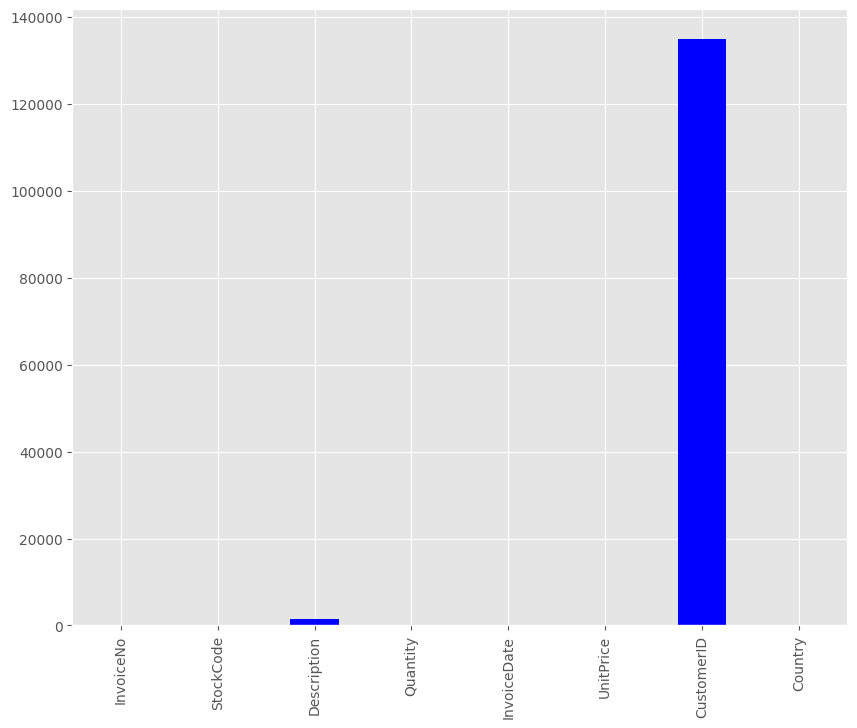

In [10]:
# Visualising Missing/Null Values
plt.figure(figsize=(10,8))
df.isna().sum().plot.bar(color='blue')

### What did you know about your dataset?

There are 5268 duplicate values in the dataset.

 Missing/Null values are present in Description & CustomerID variable .

## **3. Understanding Your Variables**

In [11]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [12]:
# Dataset Describe()
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

- **InvoiceNo:** This variable represents the invoice or transaction number assigned to each purchase. It serves as a unique identifier for each transaction. Data type: Nominal, 6-digit integral number (including 'c' prefix for cancellations).

- **StockCode:** The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory. It helps identify specific products purchased by customers. Data type: Nominal, 5-digit integral number.

- **Description:** The Description variable provides a brief description or name of the product purchased in each transaction. It gives a textual representation of the product. Data type: Nominal.

- **Quantity:** This variable denotes the quantity of each product purchased in a transaction. It represents the number of units of a particular product bought by the customer. Data type: Integer.

- **InvoiceDate:** The InvoiceDate variable indicates the date and time when each transaction took place. It helps track the timing and frequency of customer purchases. Data type: DateTime.

- **UnitPrice:** This variable represents the price of each unit of the product in the local currency (e.g., sterling, dollars, euros). It provides information about the cost of the product per unit. Data type: Float.

- **CustomerID:** The CustomerID variable serves as a unique identifier assigned to each customer. It helps track individual customer behavior and preferences. Data type: Float.

- **Country:** The Country variable represents the country where each customer resides or where the transaction took place. It provides information about the geographic location of customers. Data type: Nominal, country name.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable using a for loop
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in InvoiceNo is 25900
No. of unique values in StockCode is 4070
No. of unique values in Description is 4223
No. of unique values in Quantity is 722
No. of unique values in InvoiceDate is 23260
No. of unique values in UnitPrice is 1630
No. of unique values in CustomerID is 4372
No. of unique values in Country is 38


In [14]:
# Check Unique Values for each variable.
for i in df.columns:
  print(f"Unique Values in '{i}':")
  print(df[i].unique())
  print()


Unique Values in 'InvoiceNo':
[536365 536366 536367 ... 581585 581586 581587]

Unique Values in 'StockCode':
['85123A' 71053 '84406B' ... '90214U' '47591b' 23843]

Unique Values in 'Description':
['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']

Unique Values in 'Quantity':
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -5
     -7     -3     70    252     60    216    384    -10     27     15
     22     19     17     21     34     47    108     52  -9360    -38
     75    270     42    240     90    320   1824    204     69    -36
   -192   -144    160   2880   1

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.shape

(406829, 8)

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [20]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df=df[~df['InvoiceNo'].str.contains('C')]

Since we have to drop the negative Quantities we need to consider InvoiceNo where 'c' stands for cancellation and thus our dataset is modified.

In [21]:
df=df[df['UnitPrice']>0]

In [22]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [23]:
df.shape

(397884, 8)

### What all manipulations have you done and insights you found?

We have observed that there are some invalid values for Quantity and Unit Price so we have modified our dataset in a way where the negatives quantites are dropped and the new shape pf our dataset comes out to be(397884,8)

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-Bar plot on Description variable

In [24]:
# Chart - 1 visualization code
top_10_product= df['Description'].value_counts().reset_index().head(10)

Text(0.5, 1.0, 'Top 10 Sold Products')

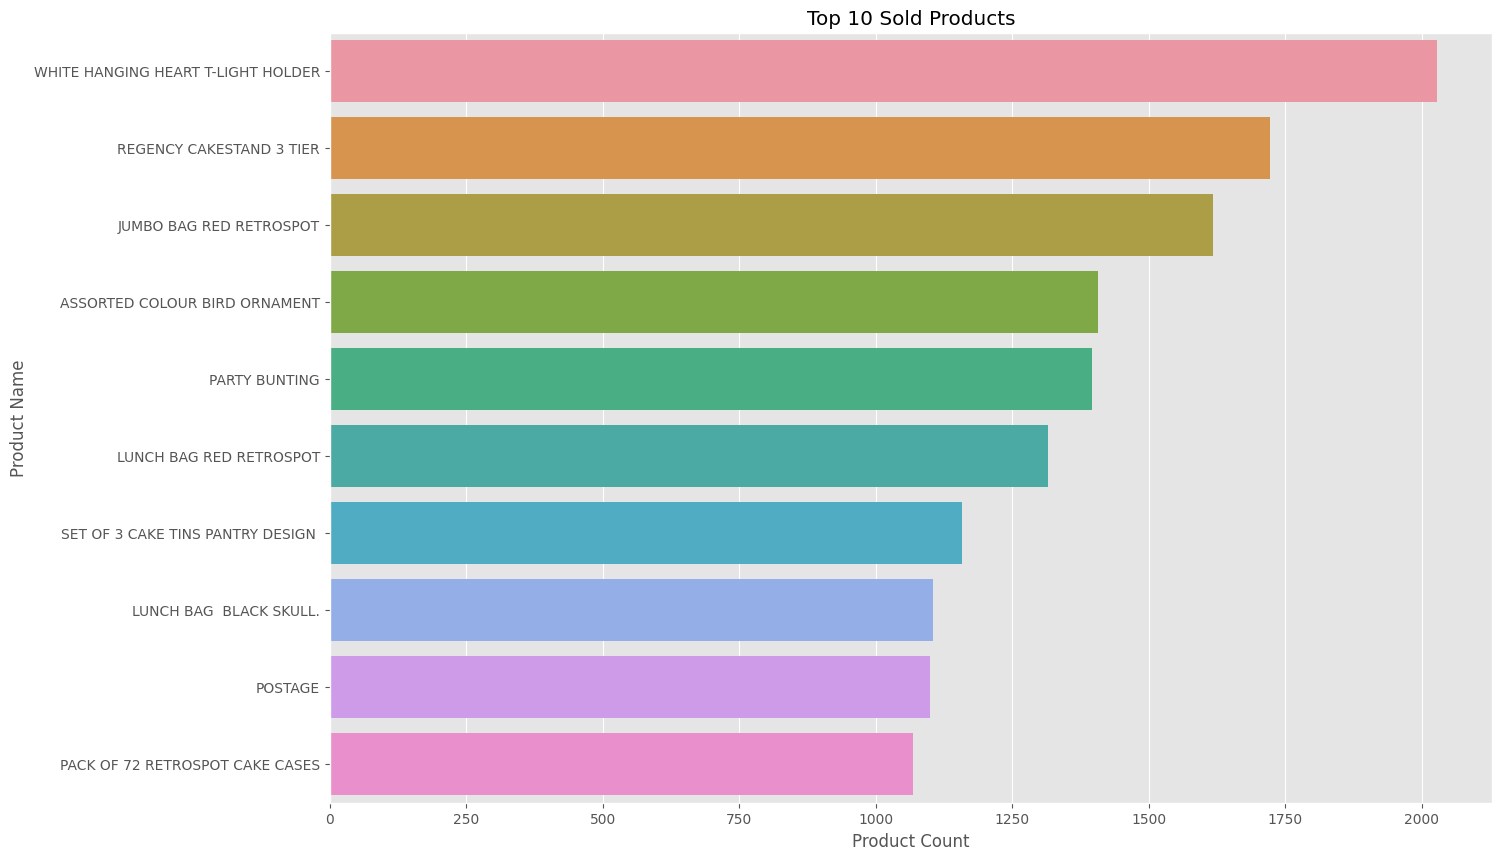

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x=top_10_product['Description'],y=top_10_product['index'])
plt.ylabel('Product Name')
plt.xlabel('Product Count')
plt.title('Top 10 Sold Products')

In [26]:
bottom_10_product= df['Description'].value_counts().reset_index().tail(10)

Text(0.5, 1.0, 'Bottom 10 Sold Products')

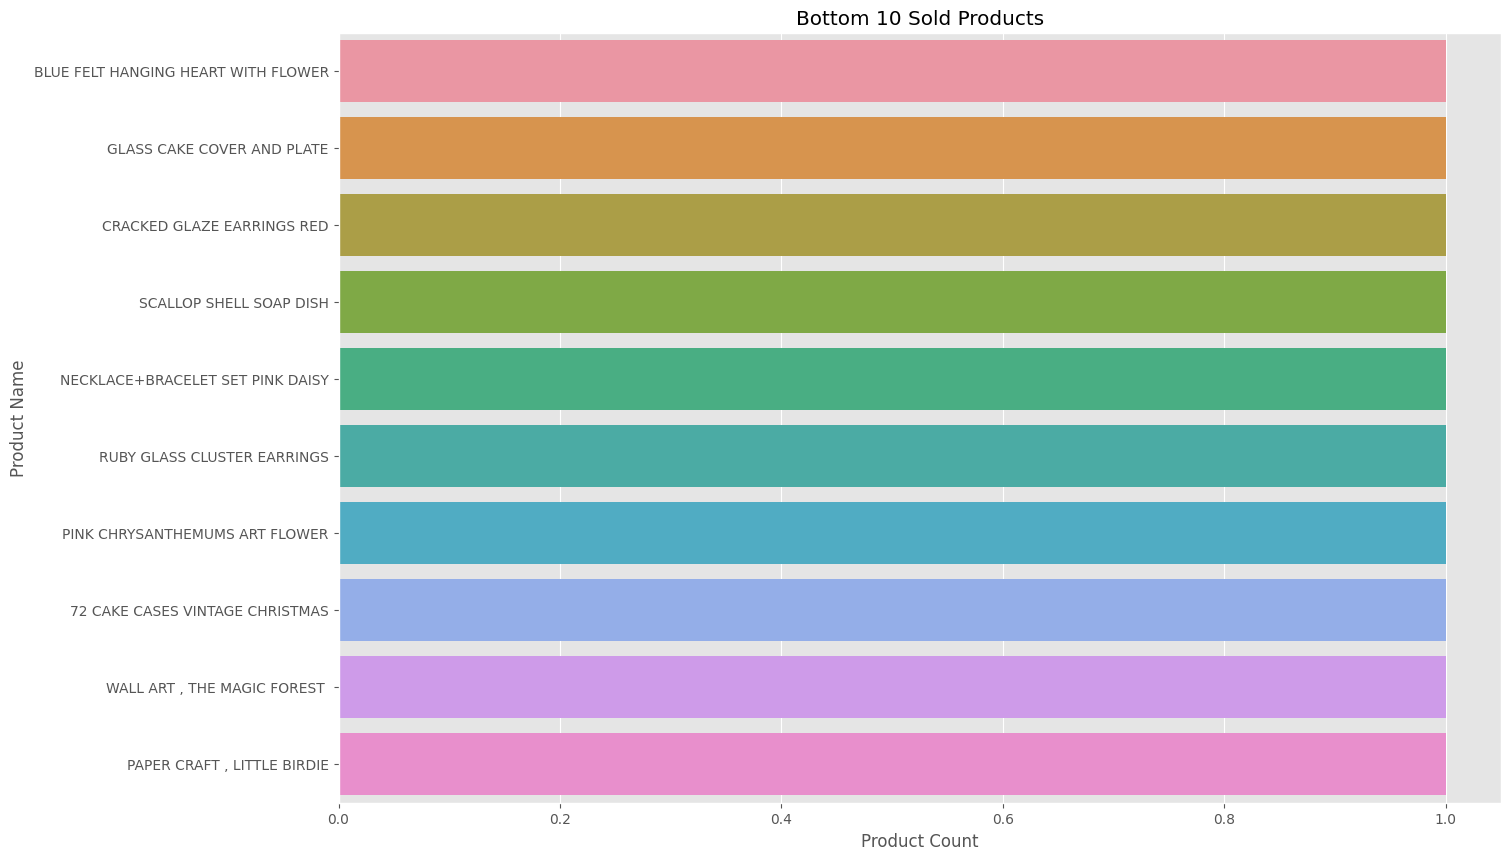

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=bottom_10_product['Description'],y=bottom_10_product['index'])
plt.ylabel('Product Name')
plt.xlabel('Product Count')
plt.title('Bottom 10 Sold Products')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
To display the Top 10 & Bottom 10 sold Products i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

WHITE HANGING HEART T-LIGHT HOLDER is the top most selling product with units more than 2000
REGENCY CAKESTAND 3 TIER is the 2nd top selling product with the units more than 1700

Whereas PAPER CRAFT,LITTLE BRIDE,etc are the least selling product

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.

#### Chart - 2-Bar plot on StockCode Variable

In [28]:
top_10_Stock=df['StockCode'].value_counts().reset_index().head(10)
bottom_10_Stock=df['StockCode'].value_counts().reset_index().tail(10)

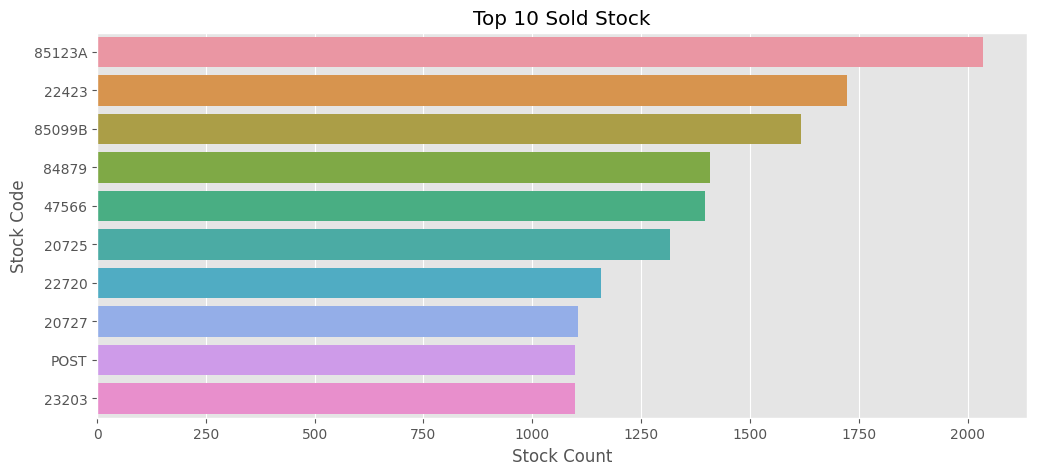

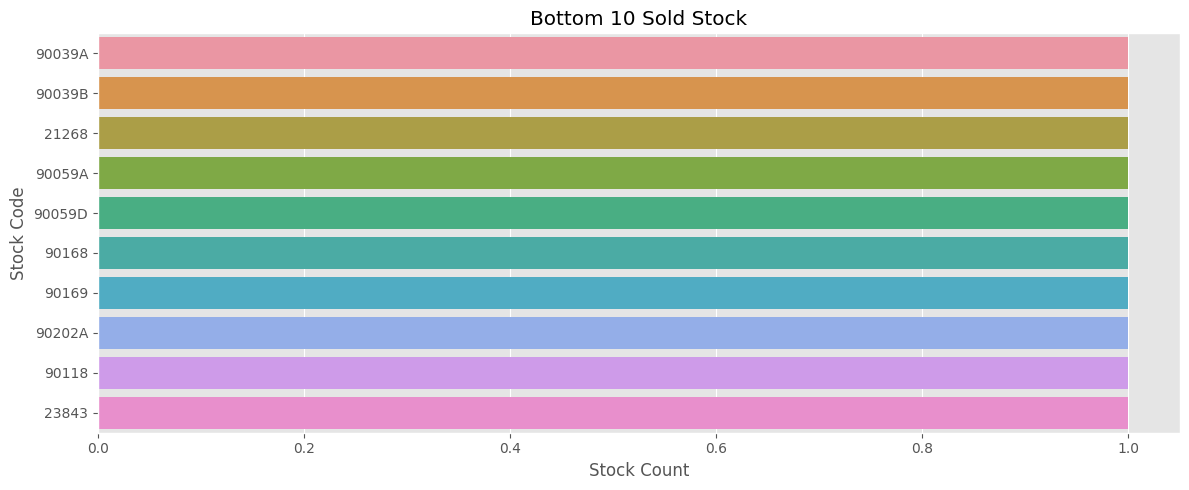

In [29]:
# Set the figure size
plt.figure(figsize=(12, 5))

# Create the first subplot for the top 10 stockcodename
# plt.subplot(1, 2, 1)
sns.barplot(x=top_10_Stock['StockCode'],y=top_10_Stock['index'])
plt.ylabel('Stock Code')
plt.xlabel('Stock Count')
plt.title('Top 10 Sold Stock')

# Create the second subplot for the bottom 10 stockcodename
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 5))
sns.barplot(x=bottom_10_Stock['StockCode'],y=bottom_10_Stock['index'])
plt.ylabel('Stock Code')
plt.xlabel('Stock Count')
plt.title('Bottom 10 Sold Stock')
# Adjust the spacing between th
plt.tight_layout()

# Display the plots
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
To display the Top 10 & Bottom 10 sold Stocks i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

It is observed that the Stockcode 85123A has the highest selling with a count of more than 2000 whereas bottom 10 stockcodes have the count of 1

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates a significant disparity in popularity or demand for these products,understanding the disparities can help businesses make informed decisions about product assortment, inventory management, marketing strategies, and resource allocation to optimize revenue and customer satisfaction.

#### Chart - 3-Bar chart on Customers Variable

In [30]:
# Chart - 3 visualization code
top_5_customers=df['CustomerID'].value_counts().reset_index().head()
bottom_5_customers=df['CustomerID'].value_counts().reset_index().tail()

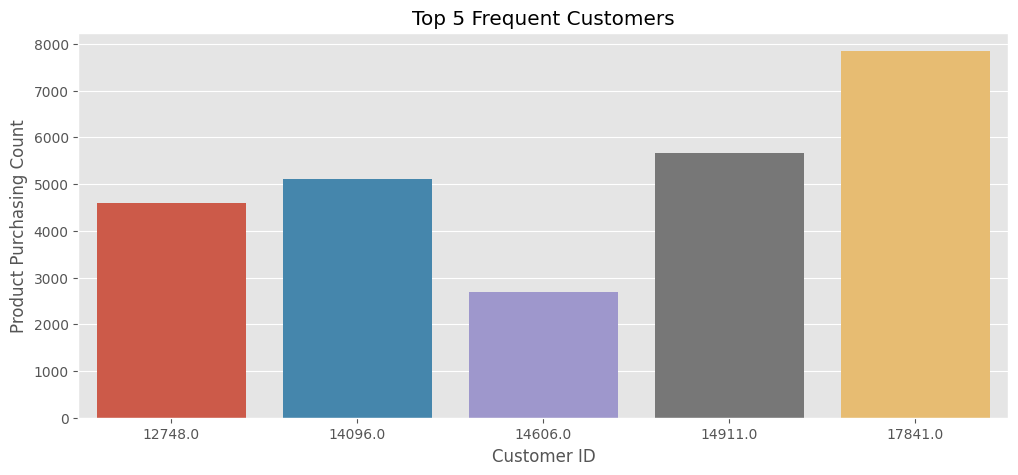

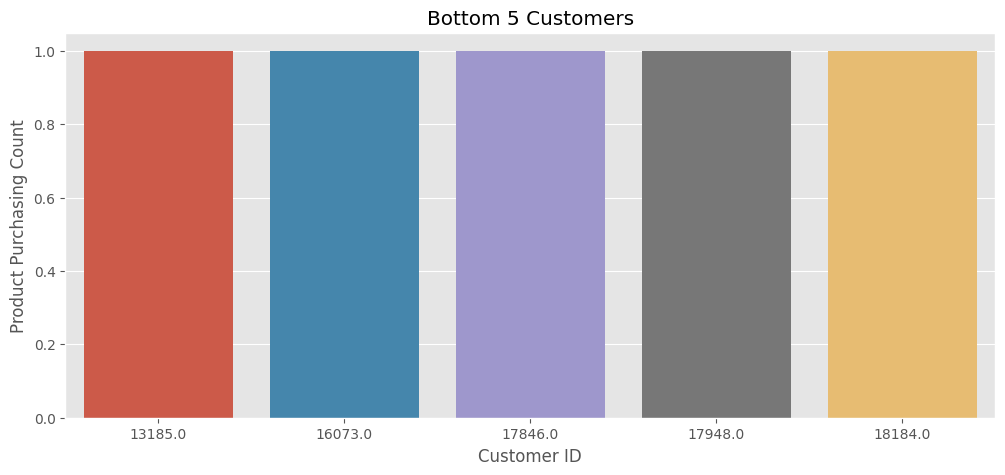

In [31]:

# Set the figure size


# Create the first subplot for the top5 customers
plt.figure(figsize=(12, 5))
sns.barplot(x=top_5_customers['index'],y=top_5_customers['CustomerID'])
plt.ylabel('Product Purchasing Count')
plt.xlabel('Customer ID')
plt.title('Top 5 Frequent Customers')

# Create the second subplot for the bottom 5 customers
plt.figure(figsize=(12, 5))
sns.barplot(x=bottom_5_customers['index'],y=bottom_5_customers['CustomerID'])
plt.ylabel('Product Purchasing Count')
plt.xlabel('Customer ID')
plt.title('Bottom 5 Customers')

# Display the plots
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space..To display the Top 5 & Bottom 5 Customers(customerid) on basis of product purchasing count i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

It is observed that customer with id 17841.0 has the highest product purchasing count  with count of more than 7000 whereas the bottom 5 customers has the product purchasing count of 1.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates a positive impact on revenue and customer loyalty, highlighting opportunities for growth and targeted marketing efforts.

#### Chart - 4 - Bar Chart on Country Variable

In [32]:
# Chart - 4 visualization code
top_5_countries=df['Country'].value_counts().reset_index().head()
bottom_5_countries=df['Country'].value_counts().reset_index().tail()


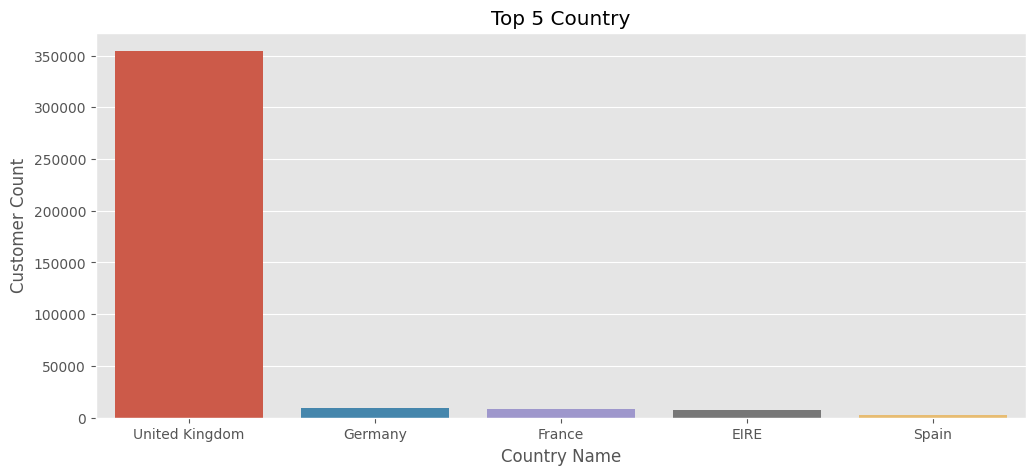

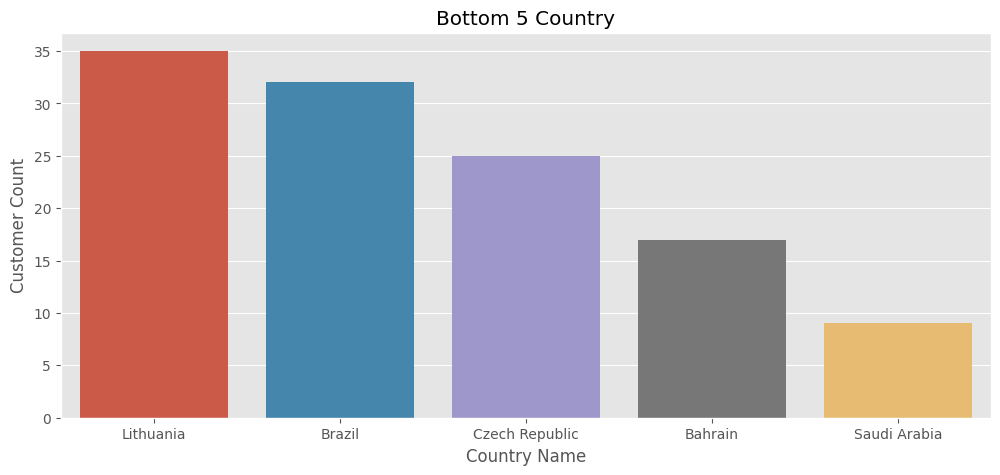

In [33]:
# Create the first subplot for the top 5 countries
plt.figure(figsize=(12, 5))
sns.barplot(x=top_5_countries['index'],y=top_5_countries['Country'])
plt.ylabel('Customer Count')
plt.xlabel('Country Name')
plt.title('Top 5 Country')

# Create the second subplot for the bottom 5 countries
plt.figure(figsize=(12, 5))
sns.barplot(x=bottom_5_countries['index'],y=bottom_5_countries['Country'])
plt.ylabel('Customer Count')
plt.xlabel('Country Name')
plt.title('Bottom 5 Country')

# Display the plots
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
To display the Top 5 & Bottom 5 Countries on the basis of customer count i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

It is observed from the graph that United Kingdom has the highest number of customers with the count above 350000 whereas Saudi Arabia has the least number of customers with count less than 10.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates a positive impact in terms of market potential, revenue generation, and growth opportunities. However, businesses should consider market dynamics, competition, and targeted approaches to effectively leverage these customer counts for success.

#### Chart - 5 - Bar Chart on Sales Count Variable

In [34]:
# Chart - 5 visualization code
sales_in_month=pd.DatetimeIndex(df['InvoiceDate']).month.value_counts().reset_index()

Text(0.5, 1.0, 'Sales count in different\xa0Months\xa0')

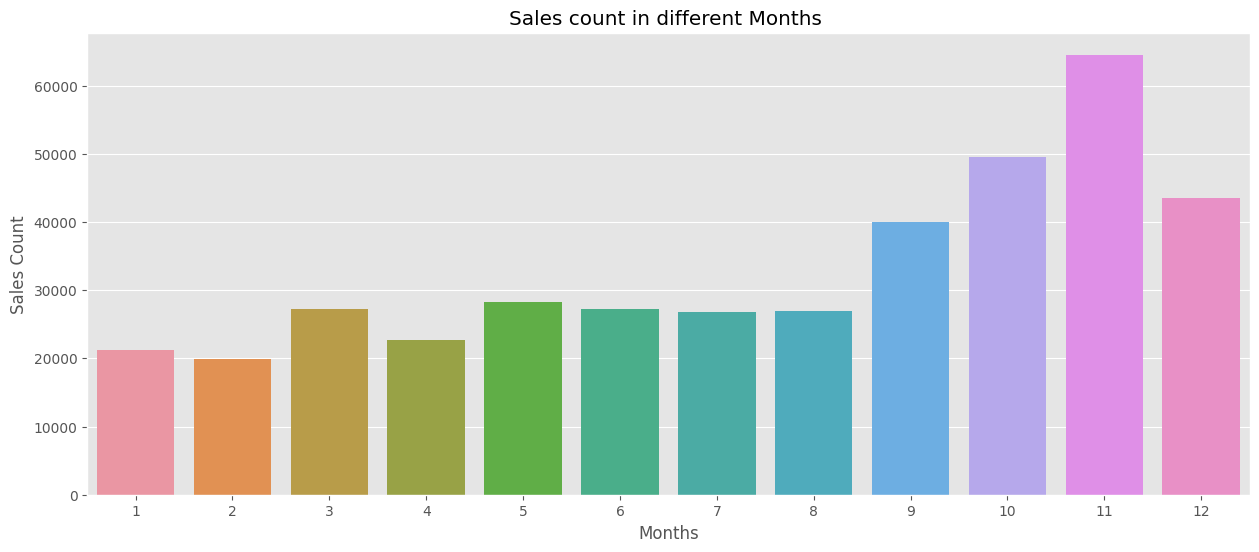

In [35]:
# Sales count in different months.
plt.figure(figsize=(15,6))
sns.barplot(x=sales_in_month['index'],y=sales_in_month['InvoiceDate'])
plt.xlabel('Months')
plt.ylabel('Sales Count')
plt.title('Sales count in different Months ')

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
To display the sales count in every month i have used bar graph.

##### 2. What is/are the insight(s) found from the chart?

The highest sales count is observed in the 11 th month whereas the lowest sales has occured in the 2 nd month.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It indicates positive impact as there is a gradual increase in the sales count for every month hence it will benefit the businesses.

# **6. Feature Engineering & Data PreProcessing**

In [36]:
df['Date'] = df['InvoiceDate'].dt.date

In [37]:
# Create a new feature TotalCost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [38]:
# Sample of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


<Axes: >

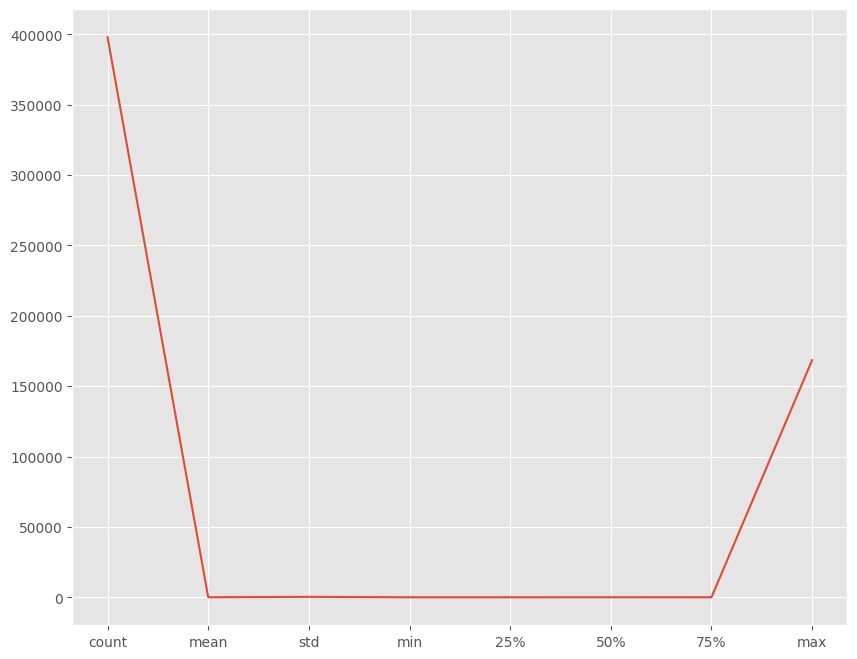

In [39]:
plt.figure(figsize=(10,8))
df['TotalCost'].describe().plot()

### 1. Handling Missing Values

#### What all missing value imputation techniques have you used and why did you use those techniques?

Missing/Null values were  present for Description & CustomerID.We have dropped the missing values in Data Wrangling section.

### 2. Handling Outliers

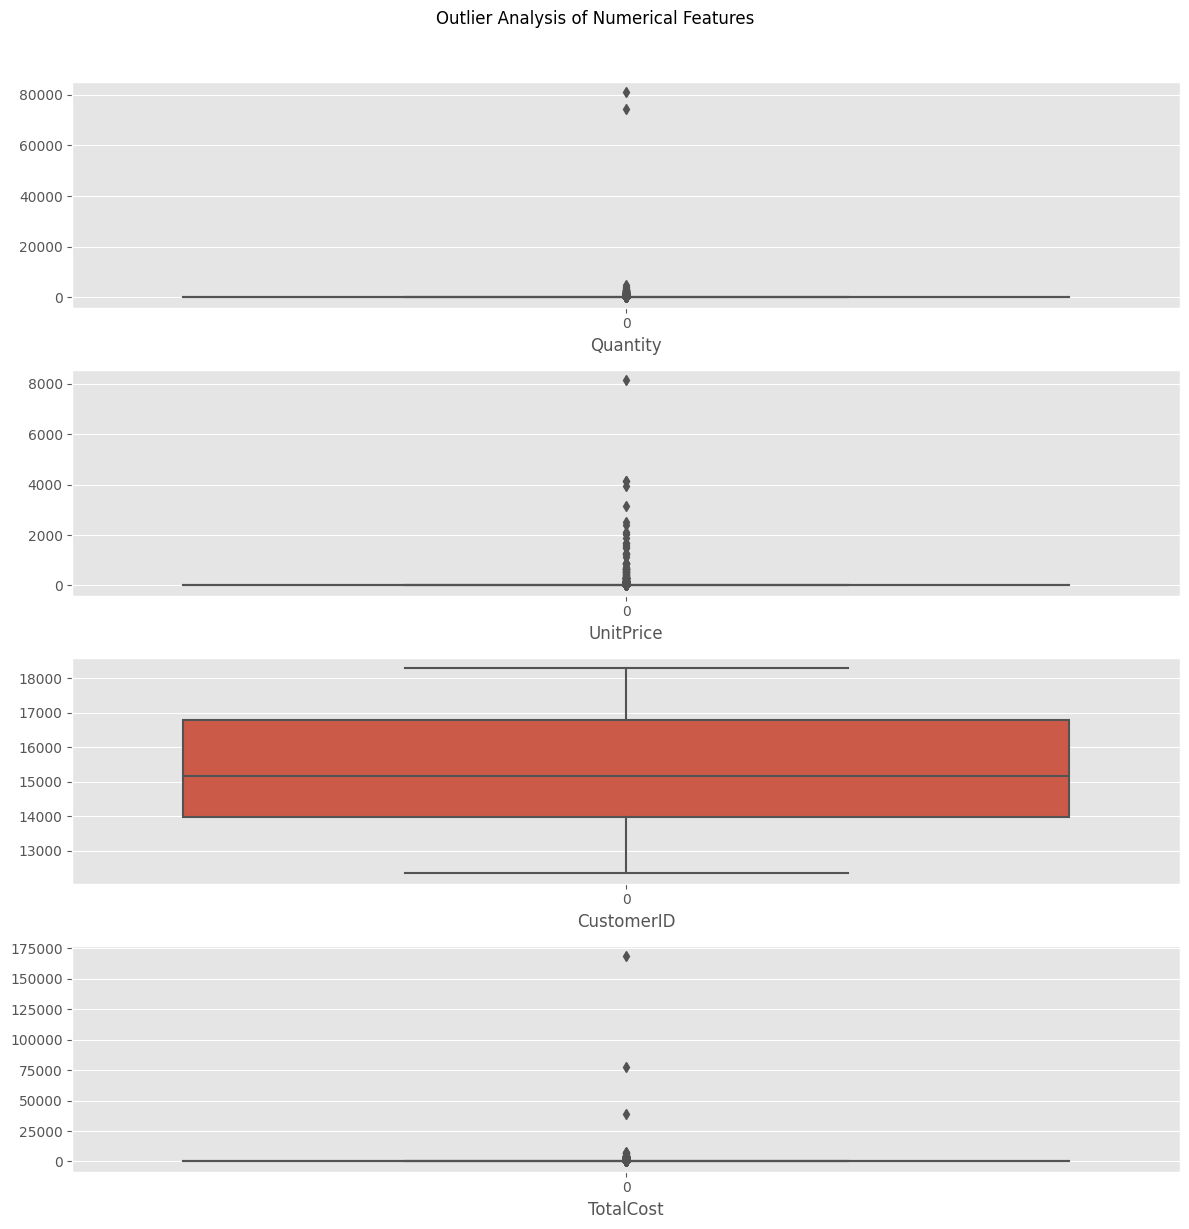

In [40]:
# Checking Outliers for each numerical feature

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features_count = len(numerical_features)

plt.figure(figsize=(12, 3*num_features_count))
plt.suptitle('Outlier Analysis of Numerical Features', y=1.02)

for i, col in enumerate(numerical_features):
    plt.subplot(num_features_count, 1, i+1)
    sns.boxplot(df[col])
    plt.xlabel(col)

plt.tight_layout()
plt.show()


##### What all outlier treatment techniques have you used and why did you use those techniques?

There are no outliers for numerical features of the dataset so there's no need to handle them.

# **7. RFM Analysis**

**RFM analysis** is a method used in marketing to divide customers into different groups based on their behavior. The acronym "RFM" stands for three important factors:

R (Recency): Number of days since last purchase

F (Frequency): Number of transactions

M (Monetary): Total amount of transactions (revenue contributed)

## **7.1 Recency**

**Recency = Latest InvoiceDate - Last InoviceData**

In [41]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})


In [42]:
latest_date = df['Date'].max()

In [43]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [44]:
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


Now we have the recency attribute created e.g: Customer with ID = 12346 did his/her last purshace 325 days ago.

## **7.2 Frequency**

In [45]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


## **7.3 Monetary Value**

In [46]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = df.groupby('CustomerID')['TotalCost'].sum().reset_index().rename(columns = {'TotalCost': 'MonetaryValue'})

monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [47]:
# Merge the recency and frequency dataframes on the customer ID column
tem_df = recency_df.merge(frequency_df, on = 'CustomerID')
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


Customer with ID = 12346.0 has recency: 325 days, frequency:1, and monetary: 77183.60

## **7.4 Customer segments with RFM Model**

To create customer segments using the RFM model, we can use a simple scoring system based on **Quintiles**.Each of the three factors (Recency, Frequency, Monetary) is assigned a score ranging from 1 to 4. A score of 4 represents the best or highest value, while a score of 1 represents the lowest or worst value.

In [48]:
# Calculate quintiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q = [0.25, 0.50, 0.75])

In [49]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()
quantiles_dict

{0.25: {'Recency': 17.0,
  'Frequency': 17.0,
  'MonetaryValue': 307.41499999999996},
 0.5: {'Recency': 50.0, 'Frequency': 41.0, 'MonetaryValue': 674.485},
 0.75: {'Recency': 141.75,
  'Frequency': 100.0,
  'MonetaryValue': 1661.7400000000002}}

## **7.5 RFM Table & Score**

In [50]:
# Create RecencyScore column by dividing into quintiles
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Create FrequencyScore column by dividing into quintiles
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing into quintiles
rfm_df['M_Score'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [51]:
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [52]:
# Calculate RFM Score
rfm_df['RFMScore'] = rfm_df['R_Score'].astype(str) + rfm_df['F_Score'].astype(str) + rfm_df['M_Score'].astype(str)
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFMScore
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


**Interpretation:**
- Best RecencyScore = 4 (most recently purchase)
- Best FrequencyScore = 4 (most frequently purchase)
- Best MonetaryScore = 4 (who spent the most)
- If the RFMScore of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
- If the RFMScore of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
- If the RFMScore of any customer is 144. He purchased a long time ago but buys frequently and spends more and so on.
- Like this we can come up with number of segments for all combinations of RecencyScore, FrequencyScore and MonetaryScore based on our usecase.
- Higher the RFMScore, more valuable the customer is.

In [53]:
# Drop the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['R_Score', 'F_Score', 'M_Score','RFMScore'], axis = 1).set_index('CustomerID')

 **Feature Correlations**

In [54]:
# Calculate the correlation between the variables
rfm_data.corr()

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.206180,-0.122241
Frequency,-0.206180,1.000000,0.422129
MonetaryValue,-0.122241,0.422129,1.000000


- I picked this chart to show the correlation between RFM.

- It is observed that there's a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

- The insights can help create a positive business impact by helping businesses better understand customer behaviour and tailor their sales and promotions accordingly.

## **Plot the distribution of Recency, Frequency, and MonetaryValue**

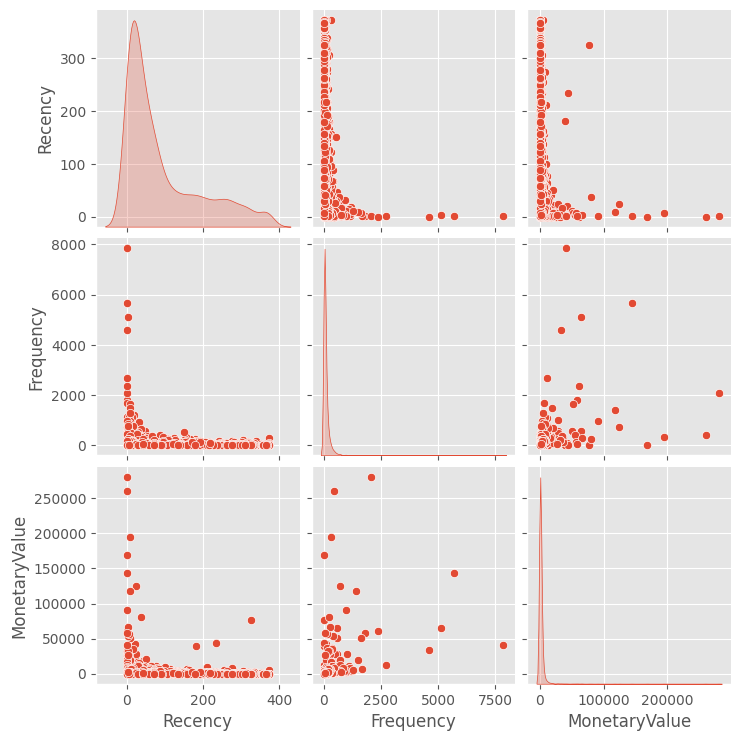

In [55]:
#Visualize the distribution of features in the dataset
sns.pairplot(rfm_data, diag_kind = 'kde')

- The pairplot with kde diagonal plots was chosen wherein we can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary.

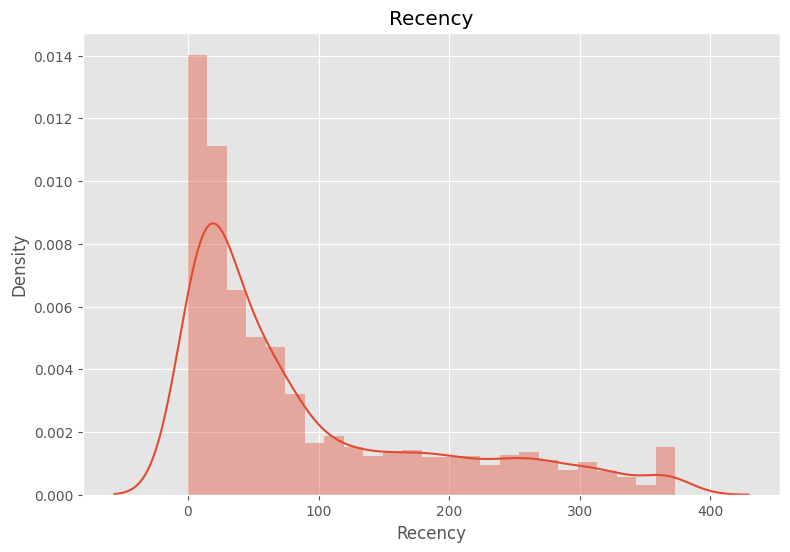

Skewness : 1.2458256565113601
Kurtosis : 0.43043193925986767


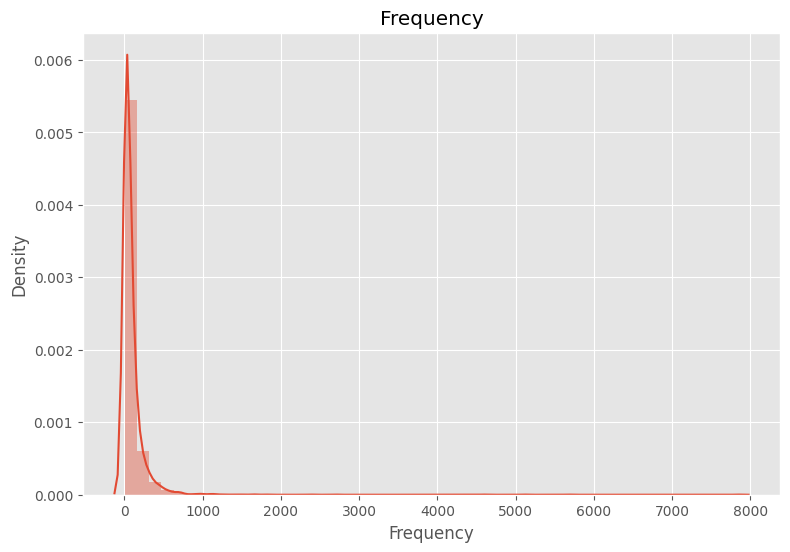

Skewness : 18.106165151380843
Kurtosis : 483.43167457208665


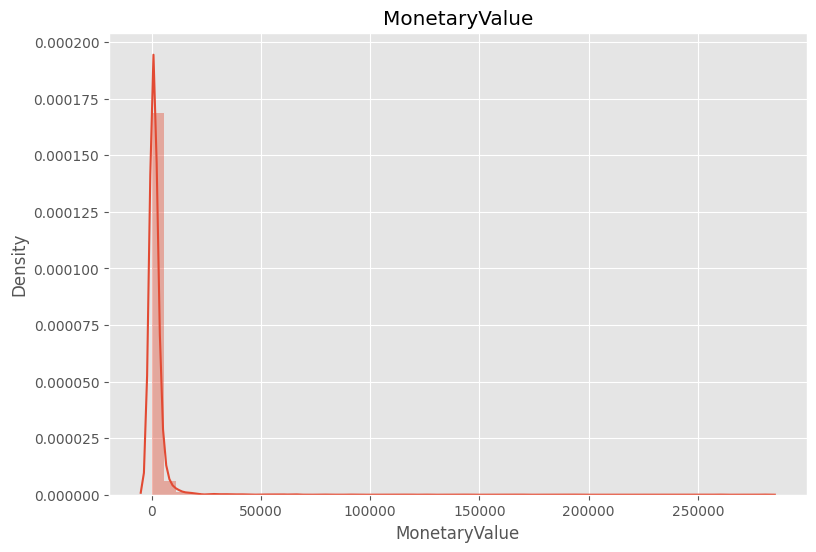

Skewness : 19.32495323682082
Kurtosis : 478.0481213244416


In [56]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in rfm_data:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (rfm_data[col])
  sns.distplot(rfm_data[col])
  # ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  # ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",rfm_data[col].skew())
  print( "Kurtosis :",rfm_data[col].kurt())

## **Data Normalization**

For data normalization, logarithmic transformations were applied to the Recency and Monetary features, while a natural logarithmic transformation was applied to the Frequency feature.A small constant value (0.1) was added to the original values before taking the logarithm to avoid taking the logarithm of zero or negative values.

In [57]:
# Calculate the logarithmic values of the Recency and Monetary features
r_log = np.log(rfm_data['Recency']+0.1)

m_log = np.log(rfm_data['MonetaryValue'] + 0.1)

f_log = np.log(rfm_data['Frequency'])

In [58]:
# Create a DataFrame containing logarithmic values of the Recency, Monetary and Frequency columns
log_data = pd.DataFrame({'Monetary' : m_log, 'Recency': r_log, 'Frequency': f_log})
log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,11.253944,5.784133,0.000000
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


                ----------------- Log Transformation Plots for R,F,M -------------------------------


<Axes: xlabel='Monetary', ylabel='Density'>

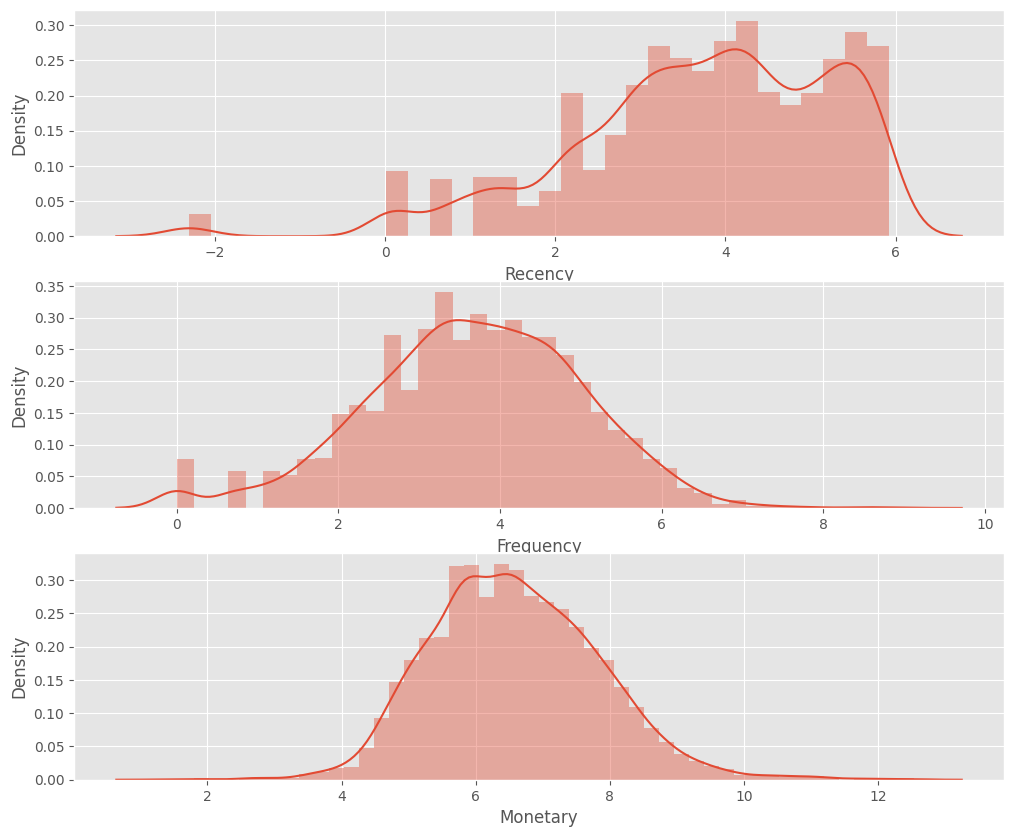

In [59]:
# Checking the distribution of Recency, Frequency and Monetary variables after log transformation
print("                ----------------- Log Transformation Plots for R,F,M -------------------------------")
plt.figure(figsize=(12,10))
plt.subplot(3, 1, 1)
sns.distplot(log_data['Recency'])
plt.subplot(3, 1, 2)
sns.distplot(log_data['Frequency'])
plt.subplot(3, 1, 3)
sns.distplot(log_data['Monetary'])

**Plot the distribution of Recency, Frequency, and MonetaryValue after Data Normalization**

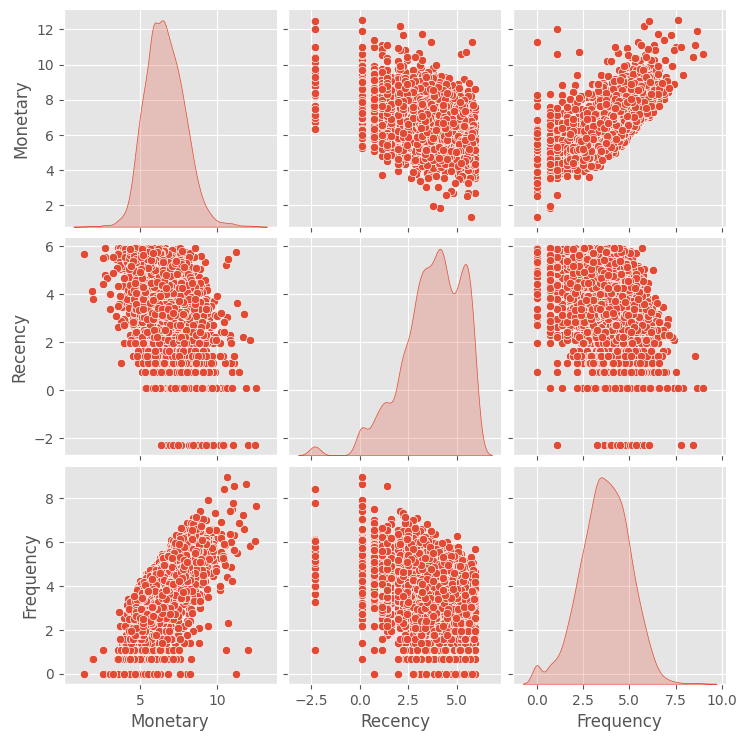

In [60]:
# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data

sns.pairplot(data = log_data, diag_kind = 'kde')

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?



The distribution of the Frequency,Recency,Monetary features have improved and appear to be more normal

In [61]:
# use the corr method of the data frame to calculate the correlation matrix
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.484533,0.756736
Recency,-0.484533,1.000000,-0.478591
Frequency,0.756736,-0.478591,1.000000


The correlation between Monetary and Frequency is now stronger.

<Axes: >

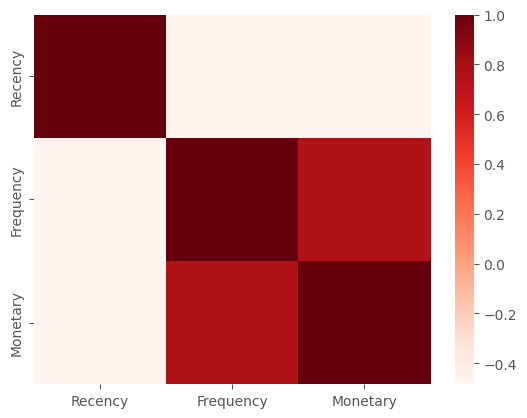

In [62]:
sns.heatmap(log_data[['Recency','Frequency', 'Monetary']].corr(),cmap="Reds")

There is a negative correlation between Recency - Frequency and Recency - Monetary, but there is a positive correlation between Frequency - Monetary which can also be seen in the variation of mean values in clusters

In [63]:
# Assign the normalized data to a variable "X"
X = log_data

## **Data Scaling**

In [64]:
from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

I have used Standardization to transform my features in order to ensure that they had a similar scale and distribution.

## ***8. ML Model Implementation***

## **8.1. K-means Implementation**

- One of the common challenges when working with k-means is the need to specify the number of clusters beforehand.To tackle this challenge, a common approach is to try different numbers of clusters and evaluate their corresponding silhouette coefficients.

- The **Silhouette Coefficient** measures the similarity of a data point to its assigned cluster, ranging from -1 (indicating dissimilarity) to 1 (indicating similarity).A higher silhouette coefficient suggests that the point is more similar to its cluster, indicating better clustering performance.

- Another method that can be used to determine the optimal number of clusters is the **Elbow method**. This technique involves plotting the number of clusters against the corresponding distortion or inertia (the sum of squared distances between each point and its centroid).
- It's worth noting that k-means is sensitive to its initializations so a smart initialization technique called **k-means++** is commonly utilized. K-means++ intelligently selects initial cluster centroids, increasing the chances of finding better cluster arrangements.

### **8.1.1 K-Means with silhouette_score**

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

In [75]:
silhouette_scores = []

for n_clusters in range(2, 16):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)

  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')


Silhouette score for 2 clusters: 0.396
Silhouette score for 3 clusters: 0.308
Silhouette score for 4 clusters: 0.297
Silhouette score for 5 clusters: 0.278
Silhouette score for 6 clusters: 0.277
Silhouette score for 7 clusters: 0.267
Silhouette score for 8 clusters: 0.263
Silhouette score for 9 clusters: 0.250
Silhouette score for 10 clusters: 0.250
Silhouette score for 11 clusters: 0.254
Silhouette score for 12 clusters: 0.261
Silhouette score for 13 clusters: 0.259
Silhouette score for 14 clusters: 0.262
Silhouette score for 15 clusters: 0.261


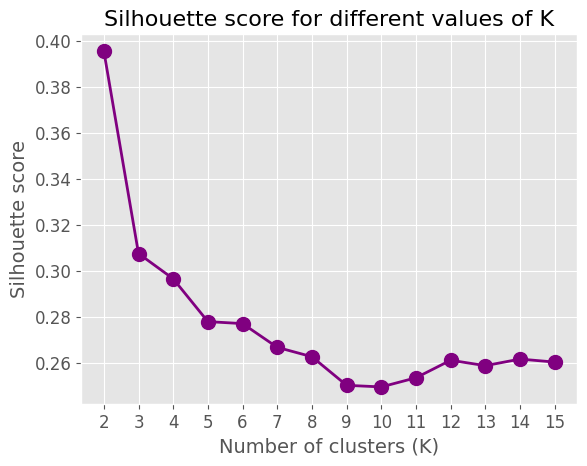

In [76]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='purple', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**It is observed that the best silhouette score obtained  when the number of clusters is 2.**

In [67]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters = 2)

# Fit the input data X to the Mean Model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

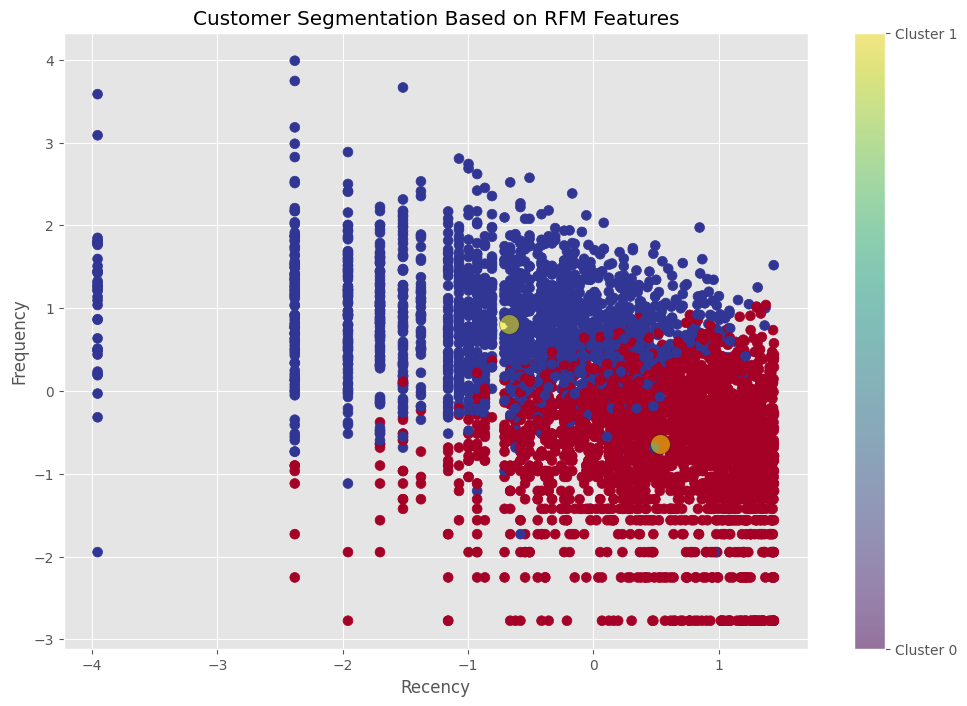

In [68]:
# Visualization of customer segmentation based On RFM features.
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')
plt.xlabel('Recency')
plt.ylabel('Frequency')
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])
plt.show()

### **8.1.2 K-Means with Elbow method**

The elbow method is a popular unsupervised learning algorithm used in K-Means clustering. Unlike supervised learning, K-Means doesn’t require labeled data. It involves randomly initializing K cluster centroids and iteratively adjusting them until they stop moving

The elbow method helps to choose the optimum value of k (number of clusters) by fitting the model with a range of values of k

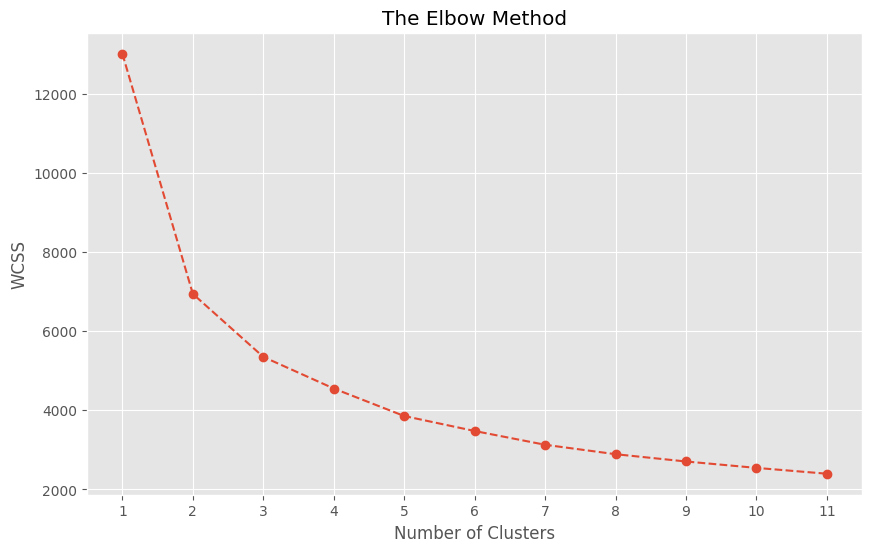

In [79]:
wcss = [] # within cluster sum of square

for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 12), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 12, 1))
plt.grid(True)
plt.show()

**Using the Elbow Method plot it is visible that the optimal number of clusters to be considered is 3**

In [82]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000)
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_
rfm_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R_Score,F_Score,M_Score,RFMScore,Cluster
0,12346.0,325,1,77183.60,1,1,4,114,2
1,12347.0,2,182,4310.00,4,4,4,444,1
2,12348.0,75,31,1797.24,2,2,4,224,2
3,12349.0,18,73,1757.55,3,3,4,334,2
4,12350.0,310,17,334.40,1,1,2,112,0
5,12352.0,36,85,2506.04,3,3,4,334,2
6,12353.0,204,4,89.00,1,1,1,111,0
7,12354.0,232,58,1079.40,1,3,3,133,2
8,12355.0,214,13,459.40,1,1,2,112,0
9,12356.0,22,59,2811.43,3,3,4,334,2


## **8.2 Agglomerative Hierarchial Clustering**

Agglomerative Hierarchical Clustering is a bottom-up approach that merges similar clusters until the desired number of clusters is achieved. It uses a distance/similarity measure between data points and can create a dendrogram to visualize the merging process.A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
We can set a threshold distance and draw a horizontal line.

In [83]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 3 clusters, euclidean affinity, and ward linkage
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

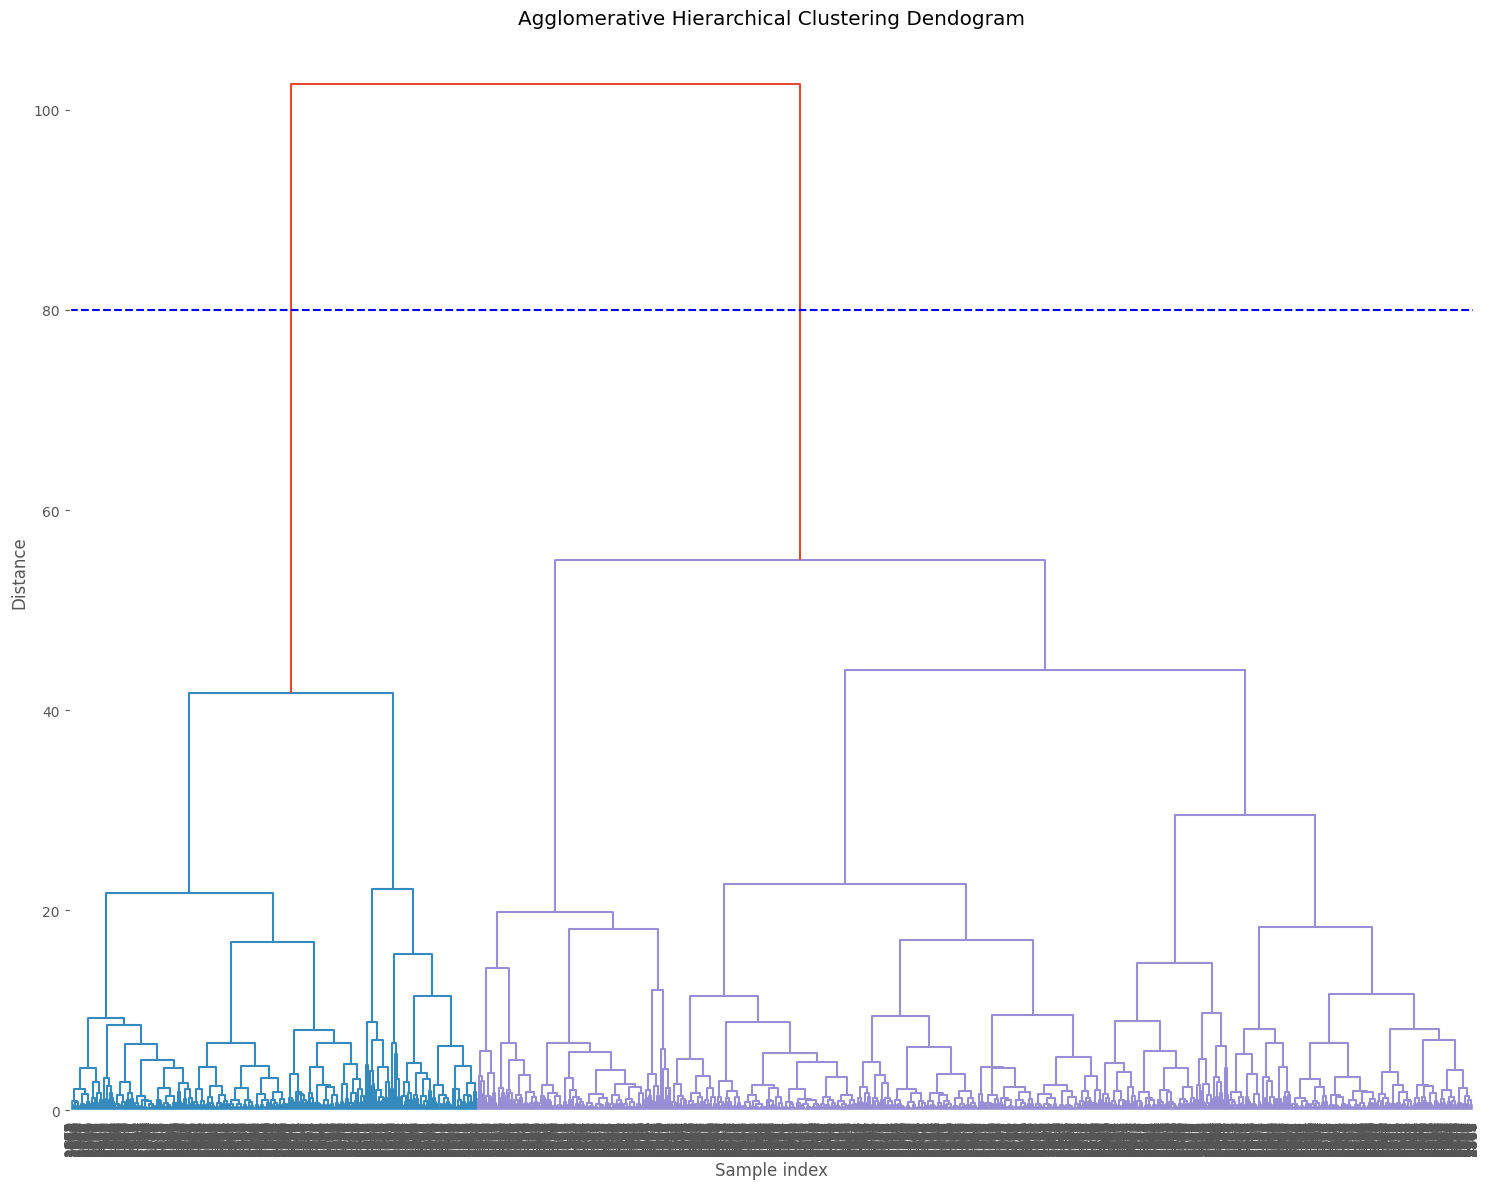

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix
Z = linkage(X, 'ward')
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')
plt.axhline(y=80, color='b', linestyle='--')
plt.tight_layout()

-The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold i.e at 80

-No. of Cluster  = 2

## **8.3 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN is a density-based clustering algorithm that groups data points based on their density in the feature space. It identifies clusters as dense regions separated by areas of lower density and is robust to noise and outliers.

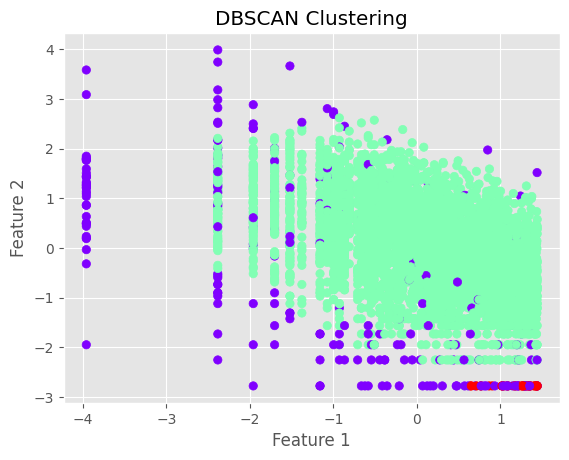

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- The chart used is a scatter plot.The x and y axes represent the two features of the dataset, and the points are colored based on their assigned cluster labels.

- The insights gained from the chart include identifying the clusters formed by the DBSCAN algorithm and their density. The points that are closer to each other are assigned to the same cluster, and the outliers or noise points are labeled as -1.

- The gained insights can help in creating a positive business impact by identifying groups of similar data points, which can aid in targeting specific segments of customers or optimizing operational processes.

# **Overall Model Summary**

In [85]:
from tabulate import tabulate

myData = (['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"],
['1', "K-Means with silhouette_score", "RFM", "2"],
['2', "K-Means with Elbow method", "RFM", "3"],
['3', "Hierarchical clustering", "RFM", "2"],
['4',"DBSCAN ", "RFM", "3"])

print(tabulate(myData))

------  -----------------------------  ----  -------------------------
SL No.  Model_Name                     Data  Optimal_Number_of_cluster
1       K-Means with silhouette_score  RFM   2
2       K-Means with Elbow method      RFM   3
3       Hierarchical clustering        RFM   2
4       DBSCAN                         RFM   3
------  -----------------------------  ----  -------------------------


# **Conclusion**

**EDA**

- Null values & some duplicate values were removed from the dataset before applying clustering.

- The top five products purchased based on frequency were White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.

- Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.

- The top five countries based on the percentage of total orders were the United Kingdom ,Germany,France,Ireland and Spain.

- The sales Count for the 11 th Month is highest.

- The top stock codes based on count values were 85123A, 22423, 85099B,84879,47566.

- New column was created of TotalCost which was calculated using the product of unit price and quantity.

- No outliers were seen for numerical data of dataset.


**Algorithm**
- RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems, making it easy to recommend and display new products to selected customers.

- Different clustering algorithms were applied to the dataset, including: Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.

1. K-Means with Silhouette_score
2. K-Means with Elbow Method
3. Hierarchical Clustering
4. DBSCAN

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***